In [66]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import math
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas import Grouper
from pandas.plotting import lag_plot
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import pmdarima as pm

In [2]:

# Importing the training set
dataset_2014 = pd.read_csv('Datasets/data.csv')

#Quarter 1
dataset_2015_Q1 = pd.read_csv('Datasets/quarter1/Divvy_Trips_2015_Q1.csv')
dataset_2016_Q1 = pd.read_csv('Datasets/quarter1/Divvy_Trips_2016_Q1.csv')
dataset_2017_Q1 = pd.read_csv('Datasets/quarter1/Divvy_Trips_2017_Q1.csv')
dataset_2018_Q1 = pd.read_csv('Datasets/quarter1/Divvy_Trips_2018_Q1.csv')

#Quarter 2 
dataset_2015_Q2 = pd.read_csv('Datasets/quarter2/Divvy_Trips_2015_Q2.csv')
dataset_2016_04  = pd.read_csv('Datasets/quarter2/Divvy_Trips_2016_04.csv')
dataset_2016_05  = pd.read_csv('Datasets/quarter2/Divvy_Trips_2016_05.csv')
dataset_2016_06  = pd.read_csv('Datasets/quarter2/Divvy_Trips_2016_06.csv')
dataset_2016_Q2 = pd.concat([dataset_2016_04, dataset_2016_05, dataset_2016_06])
dataset_2017_Q2 = pd.read_csv('Datasets/quarter2/Divvy_Trips_2017_Q2.csv')
dataset_2018_Q2 = pd.read_csv('Datasets/quarter2/Divvy_Trips_2018_Q2.csv')

#Quarter 3 
dataset_2015_07  = pd.read_csv('Datasets/quarter3/Divvy_Trips_2015_07.csv')
dataset_2015_08  = pd.read_csv('Datasets/quarter3/Divvy_Trips_2015_08.csv')
dataset_2015_09  = pd.read_csv('Datasets/quarter3/Divvy_Trips_2015_09.csv')
dataset_2015_Q3 = pd.concat([dataset_2015_07, dataset_2015_08, dataset_2015_09])
dataset_2016_Q3 = pd.read_csv('Datasets/quarter3/Divvy_Trips_2016_Q3.csv')
dataset_2017_Q3 = pd.read_csv('Datasets/quarter3/Divvy_Trips_2017_Q3.csv')
dataset_2018_Q3 = pd.read_csv('Datasets/quarter3/Divvy_Trips_2018_Q3.csv')

#Quarter 4 
dataset_2015_Q4 = pd.read_csv('Datasets/quarter4/Divvy_Trips_2015_Q4.csv')
dataset_2016_Q4 = pd.read_csv('Datasets/quarter4/Divvy_Trips_2016_Q4.csv')
dataset_2017_Q4 = pd.read_csv('Datasets/quarter4/Divvy_Trips_2017_Q4.csv')
dataset_2018_Q4 = pd.read_csv('Datasets/quarter4/Divvy_Trips_2018_Q4.csv')



In [3]:
dataset_2014['starttime'] = pd.to_datetime(dataset_2014['starttime'],infer_datetime_format=True)
dataset_2014['stoptime'] = pd.to_datetime(dataset_2014['stoptime'],infer_datetime_format=True)

#Quarter 1
dataset_2015_Q1['starttime'] = pd.to_datetime(dataset_2015_Q1['starttime'],infer_datetime_format=True)
dataset_2015_Q1['stoptime'] = pd.to_datetime(dataset_2015_Q1['stoptime'],infer_datetime_format=True)

dataset_2016_Q1['starttime'] = pd.to_datetime(dataset_2016_Q1['starttime'],infer_datetime_format=True)
dataset_2016_Q1['stoptime'] = pd.to_datetime(dataset_2016_Q1['stoptime'],infer_datetime_format=True)

dataset_2017_Q1['starttime'] = pd.to_datetime(dataset_2017_Q1['starttime'],infer_datetime_format=True)
dataset_2017_Q1['stoptime'] = pd.to_datetime(dataset_2017_Q1['stoptime'],infer_datetime_format=True)

dataset_2018_Q1['starttime'] = pd.to_datetime(dataset_2018_Q1['starttime'],infer_datetime_format=True)
dataset_2018_Q1['stoptime'] = pd.to_datetime(dataset_2018_Q1['stoptime'],infer_datetime_format=True)

#Quarter 2
dataset_2015_Q2['starttime'] = pd.to_datetime(dataset_2015_Q2['starttime'],infer_datetime_format=True)
dataset_2015_Q2['stoptime']  = pd.to_datetime(dataset_2015_Q2['stoptime'],infer_datetime_format=True)

dataset_2016_Q2['starttime'] = pd.to_datetime(dataset_2016_Q2['starttime'],infer_datetime_format=True)
dataset_2016_Q2['stoptime']  = pd.to_datetime(dataset_2016_Q2['stoptime'],infer_datetime_format=True)

dataset_2017_Q2['starttime'] = pd.to_datetime(dataset_2017_Q2['starttime'],infer_datetime_format=True)
dataset_2017_Q2['stoptime']  = pd.to_datetime(dataset_2017_Q2['stoptime'],infer_datetime_format=True)

dataset_2018_Q2['starttime'] = pd.to_datetime(dataset_2018_Q2['starttime'],infer_datetime_format=True)
dataset_2018_Q2['stoptime']  = pd.to_datetime(dataset_2018_Q2['stoptime'],infer_datetime_format=True)

#Quarter 3
dataset_2015_Q3['starttime'] = pd.to_datetime(dataset_2015_Q3['starttime'],infer_datetime_format=True)
dataset_2015_Q3['stoptime']  = pd.to_datetime(dataset_2015_Q3['stoptime'],infer_datetime_format=True)

dataset_2016_Q3['starttime'] = pd.to_datetime(dataset_2016_Q3['starttime'],infer_datetime_format=True)
dataset_2016_Q3['stoptime']  = pd.to_datetime(dataset_2016_Q3['stoptime'],infer_datetime_format=True)

dataset_2017_Q3['starttime'] = pd.to_datetime(dataset_2017_Q3['starttime'],infer_datetime_format=True)
dataset_2017_Q3['stoptime']  = pd.to_datetime(dataset_2017_Q3['stoptime'],infer_datetime_format=True)

dataset_2018_Q3['starttime'] = pd.to_datetime(dataset_2018_Q3['starttime'],infer_datetime_format=True)
dataset_2018_Q3['stoptime']  = pd.to_datetime(dataset_2018_Q3['stoptime'],infer_datetime_format=True)

#Quarter 4
dataset_2015_Q4['starttime'] = pd.to_datetime(dataset_2015_Q4['starttime'],infer_datetime_format=True)
dataset_2015_Q4['stoptime']  = pd.to_datetime(dataset_2015_Q4['stoptime'],infer_datetime_format=True)

dataset_2016_Q4['starttime'] = pd.to_datetime(dataset_2016_Q4['starttime'],infer_datetime_format=True)
dataset_2016_Q4['stoptime']  = pd.to_datetime(dataset_2016_Q4['stoptime'],infer_datetime_format=True)

dataset_2017_Q4['starttime'] = pd.to_datetime(dataset_2017_Q4['starttime'],infer_datetime_format=True)
dataset_2017_Q4['stoptime']  = pd.to_datetime(dataset_2017_Q4['stoptime'],infer_datetime_format=True)

dataset_2018_Q4['starttime'] = pd.to_datetime(dataset_2018_Q4['starttime'],infer_datetime_format=True)
dataset_2018_Q4['stoptime']  = pd.to_datetime(dataset_2018_Q4['stoptime'],infer_datetime_format=True)

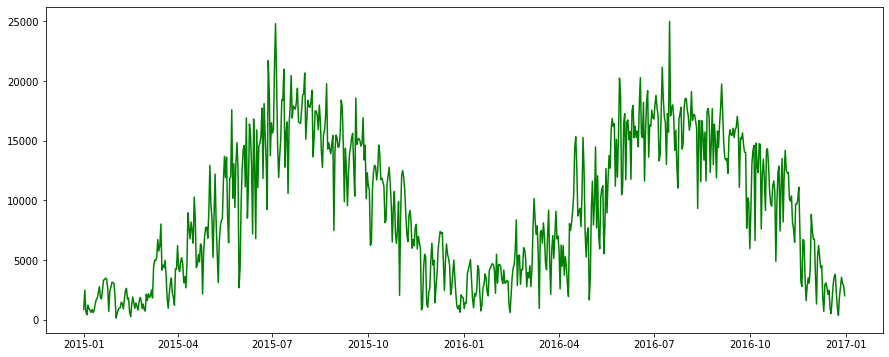

In [76]:
df2015and2016 = pd.concat([dataset_2015_Q1,dataset_2015_Q2,dataset_2015_Q3,dataset_2015_Q4,dataset_2016_Q1,dataset_2016_Q2,dataset_2016_Q3,dataset_2016_Q4])
traindata2015and2016 = pd.concat([dataset_2015_Q1,dataset_2015_Q2,dataset_2015_Q3,dataset_2015_Q4])
testdata2015and2016  = pd.concat([dataset_2016_Q1,dataset_2016_Q2,dataset_2016_Q3,dataset_2016_Q4])
final_1516  = pd.DataFrame(df2015and2016.groupby(df2015and2016['starttime'].dt.date).count()['trip_id'])
sc1 = pd.DataFrame(traindata2015and2016.groupby(traindata2015and2016['starttime'].dt.date).count()['trip_id'])
sc2 = pd.DataFrame(testdata2015and2016.groupby(testdata2015and2016['starttime'].dt.date).count()['trip_id'])
final_1516.columns = ['checkout']
sc1.columns = ["checkout"]
sc2.columns= ["checkout"]
plt.plot(final_1516.index,final_1516.checkout,color='green')
#plt.plot(sc1.index,sc1.checkout,color='blue')
#plt.plot(sc2.index,sc2.checkout,color='red')

In [9]:
traindata2015and2016.shape

(3183439, 12)

In [72]:
sc

,checkout
starttime,
2015-01-01,862
2015-01-02,2474
2015-01-03,697
2015-01-04,403
2015-01-05,1220
...,...
2016-12-27,2764
2016-12-28,3556
2016-12-29,3039


In [116]:
# Build Model
def modelARIMA(train,test):
    model = ARIMA(train, order=(1,1,1))  
    #model = ARIMA(train, order=(1, 1, 1))  
    fitted = model.fit(disp=0)  
    print(fitted.summary())
    # Forecast
    fc, se, conf = fitted.forecast(test.shape[0], alpha=0.05)  # 95% conf
    
    # Make as pandas series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(conf[:, 0], index=test.index)
    upper_series = pd.Series(conf[:, 1], index=test.index)

    # Plot
    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(train, label='training')
    plt.plot(test, label='actual')
    plt.plot(fc_series, label='forecast')
    plt.fill_between(lower_series.index, lower_series, upper_series, 
                     color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()
    return fc,fc_series
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    print("actual shape:",forecast.shape,actual.shape)
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})


In [117]:
#Test stationarity 
def teststationarity(timeseries): 
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=365,center=False).mean() 
    rolstd = timeseries.rolling(window=365,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['checkout'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

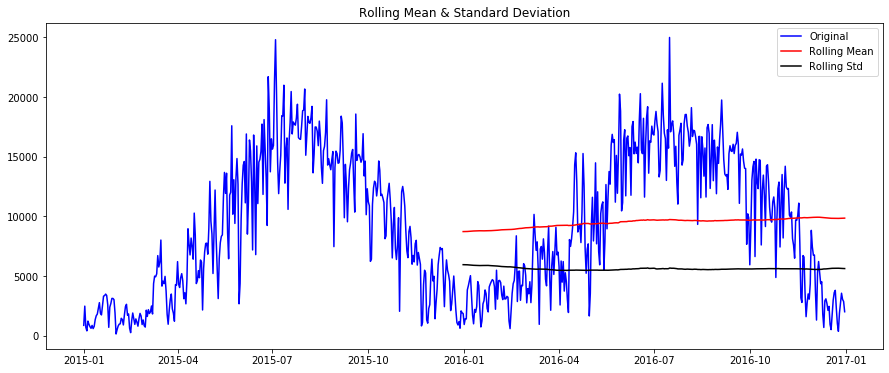

Results of Dickey-Fuller Test:
Test Statistic                  -1.506440
p-value                          0.530323
#Lags Used                      13.000000
Number of Observations Used    717.000000
Critical Value (1%)             -3.439503
Critical Value (5%)             -2.865579
Critical Value (10%)            -2.568921
dtype: float64


In [118]:
teststationarity(final_1516)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:             D.checkout   No. Observations:                  699
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6429.401
Method:                       css-mle   S.D. of innovations           2388.701
Date:                Tue, 26 Nov 2019   AIC                          12866.803
Time:                        11:26:58   BIC                          12885.001
Sample:                    01-02-2015   HQIC                         12873.838
                         - 11-30-2016                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.8317     19.500      0.350      0.726     -31.388      45.051
ar.L1.D.checkout     0.3240      0.045      7.123      0.000       0.235       0.413
ma.L1.D.checkout    -0.8552 

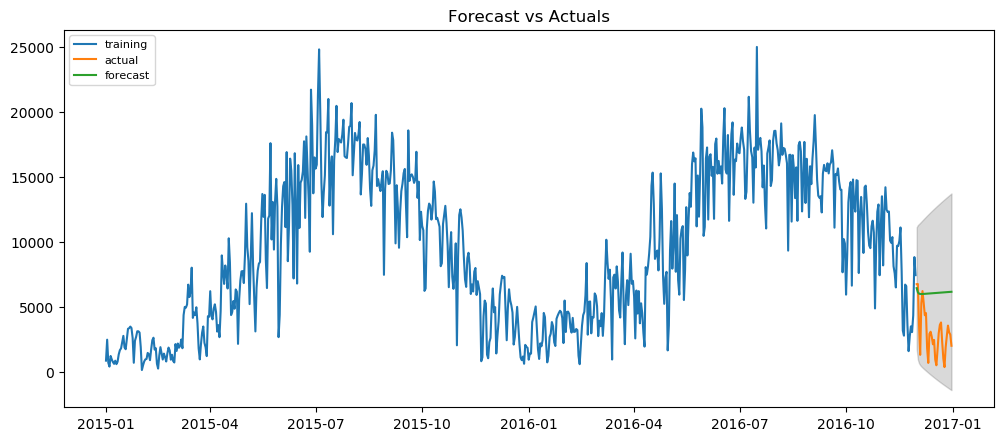

In [108]:
# Create Training and Test
train = final_1516[:700]
test = final_1516[700:]
fc,fc_series = modelARIMA(train,test)

#forecast_accuracy(fc.values, test.trip_id[None,:])

In [94]:
#Auto Arima
def auto_arima(df):
    model = pm.auto_arima(df.checkout, start_p=1, start_q=1,
                          test='adf',       # use adftest to find optimal 'd'
                          max_p=3, max_q=3, # maximum p and q
                          m=1,              # frequency of series
                          d=None,           # let model determine 'd'
                          seasonal=False,   # No Seasonality
                          start_P=0, 
                          D=0, 
                          trace=True,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=True)

    print(model.summary())

In [101]:
def logfunction(df):
    ts_log = np.log(df)
    #plt.plot(ts_log)
    ts_smooth = ts_log.rolling(window = 12).mean()
    plt.plot(ts_smooth, color = 'red')
    plt.plot(ts_log)
    plt.show()
    # Case 1: No subtraction
    no_sub_ts = ts_smooth
    no_sub_ts.dropna(inplace = True)

    # Case 2: Yes subtraction
    final_sub_ts = ts_log - ts_smooth
    final_sub_ts.dropna(inplace = True)
    return final_sub_ts

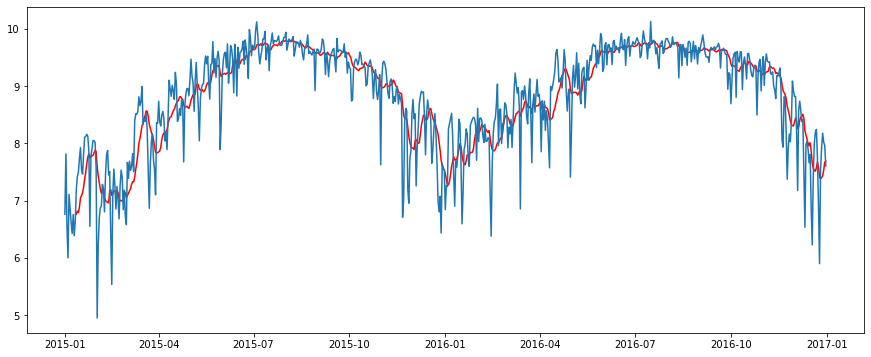

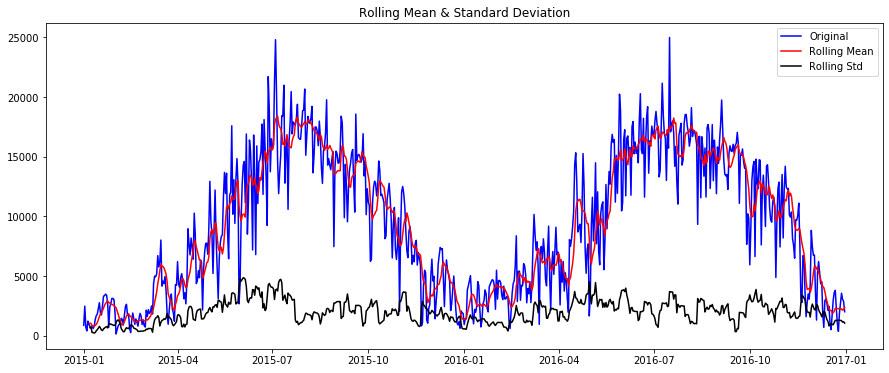

Results of Dickey-Fuller Test:
Test Statistic                  -1.506440
p-value                          0.530323
#Lags Used                      13.000000
Number of Observations Used    717.000000
Critical Value (1%)             -3.439503
Critical Value (5%)             -2.865579
Critical Value (10%)            -2.568921
dtype: float64


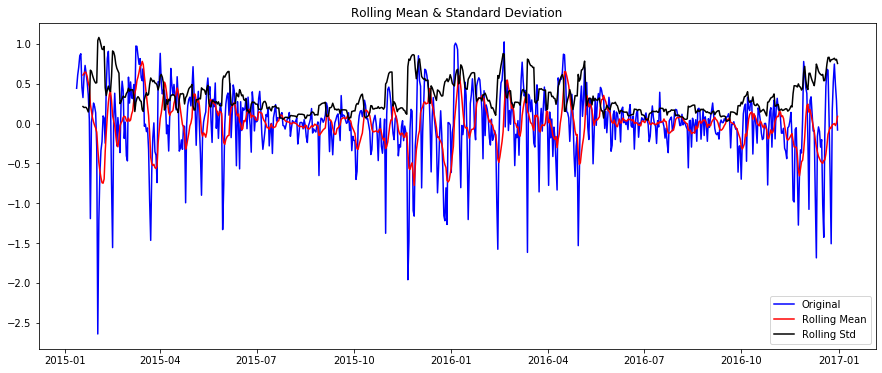

Results of Dickey-Fuller Test:
Test Statistic                  -5.545776
p-value                          0.000002
#Lags Used                      20.000000
Number of Observations Used    699.000000
Critical Value (1%)             -3.439740
Critical Value (5%)             -2.865684
Critical Value (10%)            -2.568977
dtype: float64


In [107]:
final_sub_ts = logfunction(final_1516)
# Perform Dickey-Fuller on both
teststationarity(final_1516)
teststationarity(final_sub_ts)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:             D.checkout   No. Observations:                  699
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -284.744
Method:                       css-mle   S.D. of innovations              0.362
Date:                Tue, 26 Nov 2019   AIC                            577.489
Time:                        11:28:36   BIC                            595.688
Sample:                    01-13-2015   HQIC                           584.524
                         - 12-11-2016                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0002      0.000     -1.714      0.087      -0.001    3.46e-05
ar.L1.D.checkout     0.5202      0.033     15.824      0.000       0.456       0.585
ma.L1.D.checkout    -0.9999 

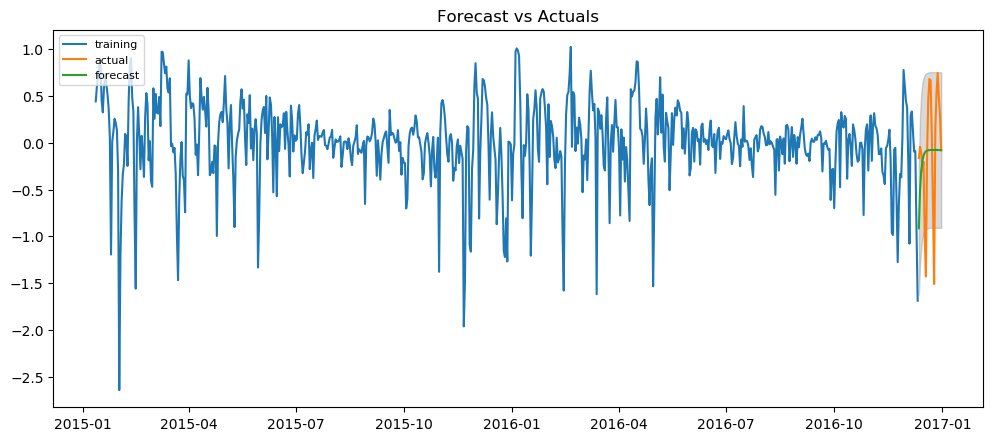

In [114]:
# Create Training and Test
train = final_sub_ts[:700]
test = final_sub_ts[700:]
fc,fc_series = modelARIMA(train,test)

#forecast_accuracy(fc.values, test.trip_id[None,:])


In [112]:
final_sub_ts.shape

(720, 1)